In [25]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from networkx import *
from pylab import *

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import random
root = "../data/date_folders/"


G = nx.read_gexf('../data/date_folders/april_17/graphs/antiwork.gexf')
G = nx.read_gexf('../data/date_folders/may_7/graphs/cooking.gexf')

In [61]:
def make_graph(path, name, dir):
    G = nx.read_gexf(path)
    S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
    s = max(S, key=len)
    fig, ax = plt.subplots(figsize = (15, 12), dpi = 400)
    fig.set_alpha(0.85)
    ax.set_facecolor('white')
    fig.set_facecolor('white')
    edges,weights = zip(*nx.get_edge_attributes(s,'sentiment').items())
    nodes, polarities = zip(*nx.get_node_attributes(s,'polarity').items())
    ax.axis('off')
    nx.draw_networkx(s, node_color=polarities, edgelist=edges, edge_color=weights, width=2.0,
                      edge_cmap=plt.cm.get_cmap('coolwarm_r'), cmap =plt.cm.get_cmap('coolwarm_r'), with_labels=False,
                          pos= nx.spring_layout(s), ax=ax, vmin = -10, vmax = 10,
                          edge_vmin = -1, edge_vmax = 1
                          )
    plt.savefig(f'{dir}/{name}.png')

../data/date_folders/april_2/graphs/music.gexf
../data/date_folders/april_2/graphs/2apr_2Music.gexf
../data/date_folders/april_2/graphs/2aprMusic.gexf
../data/date_folders/april_4/graphs/gaming.gexf
../data/date_folders/may_7/graphs/Cooking.gexf
../data/date_folders/feb_28/graphs/politics_network.gexf
../data/date_folders/feb_28/graphs/politics.gephi
../data/date_folders/feb_28/graphs/politics_network
../data/date_folders/feb_28/graphs/politics_network.csv
../data/date_folders/april_17/graphs/antiwork.gexf
../data/date_folders/march_19/graphs/gaming_network.gexf
../data/date_folders/march_19/graphs/tarkov_network.gexf
../data/date_folders/march_19/graphs/tarkov.gexf
../data/date_folders/march_19/graphs/politics.gexf
../data/date_folders/march_19/graphs/politics_network.gexf
../data/date_folders/march_19/graphs/HuntShowdown.gexf
../data/date_folders/march_19/graphs/gaming.gexf
../data/date_folders/march_19/graphs/HuntShowdown_network.gexf
../data/date_folders/march_19/graphs/EscapefromT

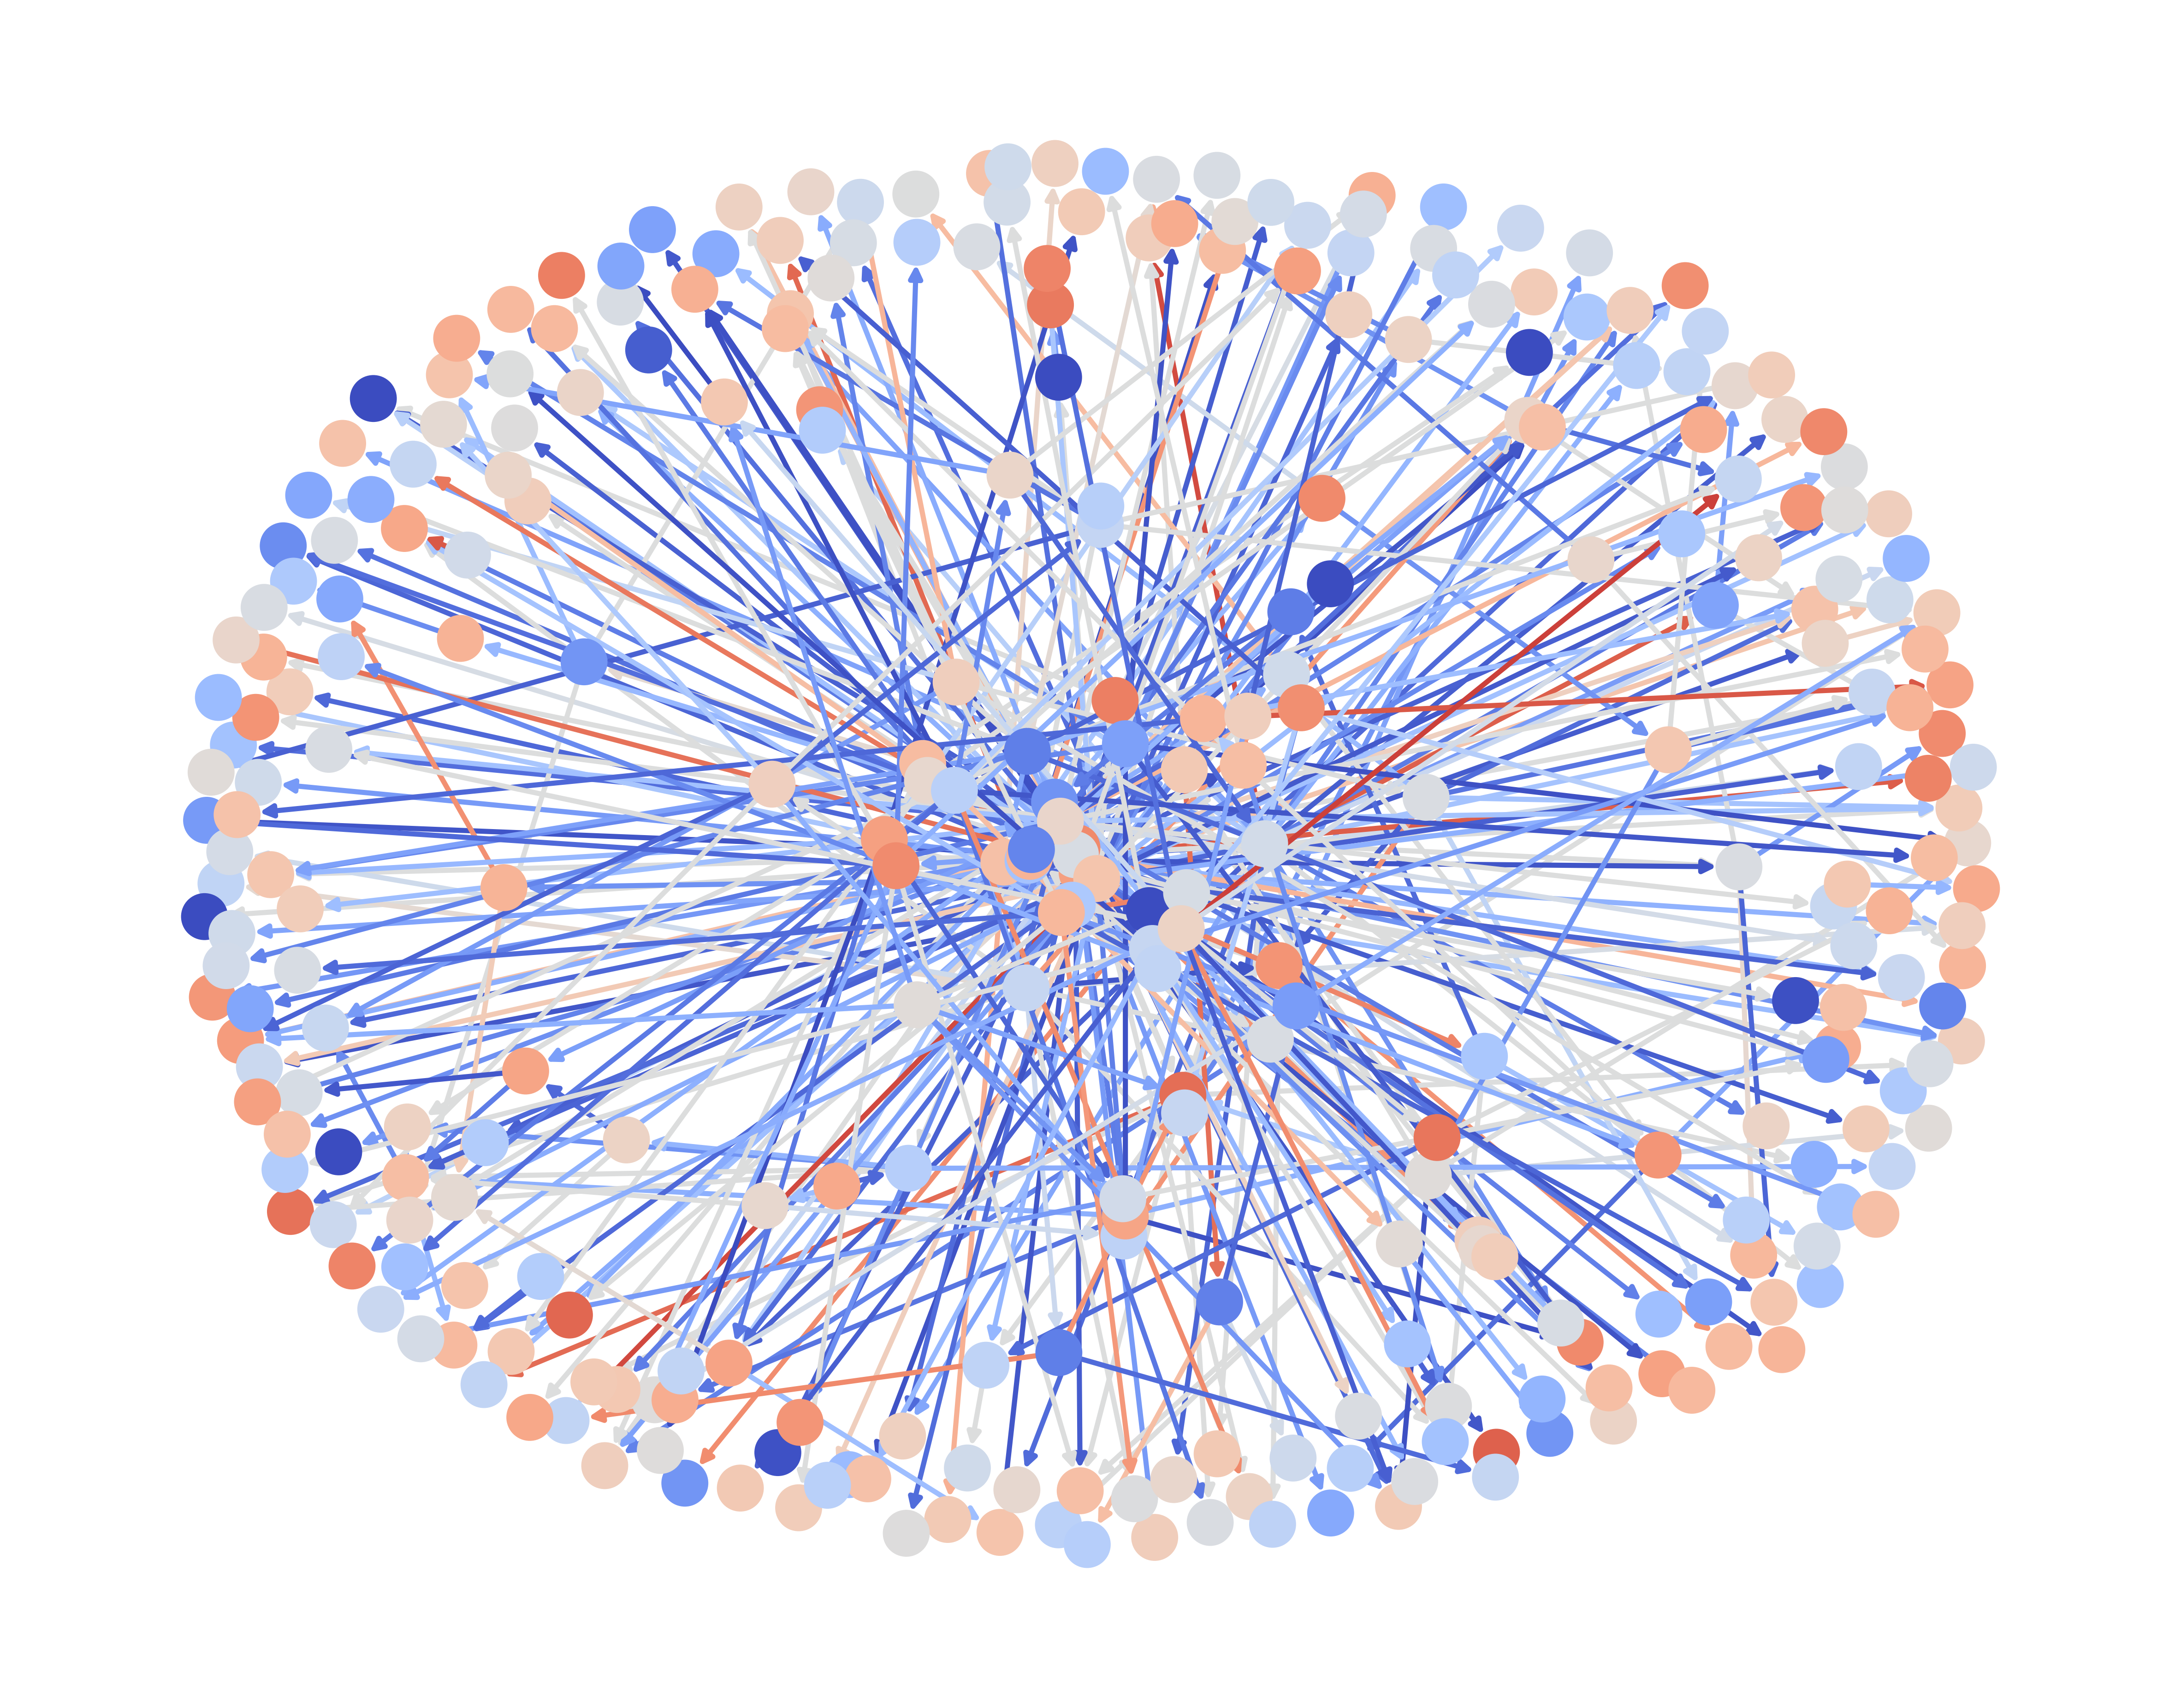

In [62]:
for date in os.listdir(root):
    if date != '.DS_Store':
        for file in os.listdir(os.path.join(root,date)+'/graphs'):
            #print(file)
            file_path = os.path.join(root,date)+f'/graphs/{file}'
            print(file_path)
            if date.startswith('may'):
                if file.endswith('.gexf'):
                    make_graph(file_path, file[:-5], '../data/network_plots/')